# Understanding Word Embeddings

# Imports

In [3]:
import numpy as np
import zipfile
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Download GloVe

In [ ]:
# https://nlp.stanford.edu/projects/glove/

In [ ]:
# !wget http://nlp.stanford.edu/data/glove.6B.zip
# !unzip glove.6B.zip

In [1]:
glove_zip_path = "/content/drive/MyDrive/Colab Notebooks/glove.6B.zip"

In [4]:
with zipfile.ZipFile(glove_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/glove')

In [5]:
glove_file_path = '/content/glove/glove.6B.300d.txt'

# Loading GloVe Word Embeddings

In [6]:
def load_glove_embeddings(file_path):
    embeddings_index = {}
    with open(file_path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            weights = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = weights
    return embeddings_index

embeddings_index = load_glove_embeddings(glove_file_path)

In [7]:
list(embeddings_index.items())[:10]

[('the',
  array([ 4.6560e-02,  2.1318e-01, -7.4364e-03, -4.5854e-01, -3.5639e-02,
          2.3643e-01, -2.8836e-01,  2.1521e-01, -1.3486e-01, -1.6413e+00,
         -2.6091e-01,  3.2434e-02,  5.6621e-02, -4.3296e-02, -2.1672e-02,
          2.2476e-01, -7.5129e-02, -6.7018e-02, -1.4247e-01,  3.8825e-02,
         -1.8951e-01,  2.9977e-01,  3.9305e-01,  1.7887e-01, -1.7343e-01,
         -2.1178e-01,  2.3617e-01, -6.3681e-02, -4.2318e-01, -1.1661e-01,
          9.3754e-02,  1.7296e-01, -3.3073e-01,  4.9112e-01, -6.8995e-01,
         -9.2462e-02,  2.4742e-01, -1.7991e-01,  9.7908e-02,  8.3118e-02,
          1.5299e-01, -2.7276e-01, -3.8934e-02,  5.4453e-01,  5.3737e-01,
          2.9105e-01, -7.3514e-03,  4.7880e-02, -4.0760e-01, -2.6759e-02,
          1.7919e-01,  1.0977e-02, -1.0963e-01, -2.6395e-01,  7.3990e-02,
          2.6236e-01, -1.5080e-01,  3.4623e-01,  2.5758e-01,  1.1971e-01,
         -3.7135e-02, -7.1593e-02,  4.3898e-01, -4.0764e-02,  1.6425e-02,
         -4.4640e-01,  1.7197

In [8]:
len(embeddings_index)

400000

In [9]:

len(next(iter(embeddings_index.values())))

300

In [10]:
embeddings_index.get("love")

array([-4.5205e-01, -3.3122e-01, -6.3607e-02,  2.8325e-02, -2.1372e-01,
        1.6839e-01, -1.7186e-02,  4.7309e-02, -5.2355e-02, -9.8706e-01,
        5.3762e-01, -2.6893e-01, -5.4294e-01,  7.2487e-02,  6.6193e-02,
       -2.1814e-01, -1.2113e-01, -2.8832e-01,  4.8161e-01,  6.9185e-01,
       -2.0022e-01,  1.0082e+00, -1.1865e-01,  5.8710e-01,  1.8482e-01,
        4.5799e-02, -1.7836e-02, -3.3952e-01,  2.9314e-01, -1.9951e-01,
       -1.8930e-01,  4.3267e-01, -6.3181e-01, -2.9510e-01, -1.0547e+00,
        1.8231e-01, -4.5040e-01, -2.7800e-01, -1.4021e-01,  3.6785e-02,
        2.6487e-01, -6.6712e-01, -1.5204e-01, -3.5001e-01,  4.0864e-01,
       -7.3615e-02,  6.7630e-01,  1.8274e-01, -4.1660e-02,  1.5014e-02,
        2.5216e-01, -1.0109e-01,  3.1915e-02, -1.1298e-01, -4.0147e-01,
        1.7274e-01,  1.8497e-03,  2.4456e-01,  6.8777e-01, -2.7019e-01,
        8.0728e-01, -5.8296e-02,  4.0550e-01,  3.9893e-01, -9.1688e-02,
       -5.2080e-01,  2.4570e-01,  6.3001e-02,  2.1421e-01,  3.31

In [11]:
len(embeddings_index.get("love"))

300

# Cosine Similarity for Love & Hate

In [12]:
def get_vector(word):
    return embeddings_index.get(word)

In [13]:
vec1 = get_vector("love")

vec2 = get_vector("hate")

In [14]:
cos_sim = np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

In [15]:
cos_sim

0.45296258

# 2D Visualization of 'love' and 'hate' Vectors"

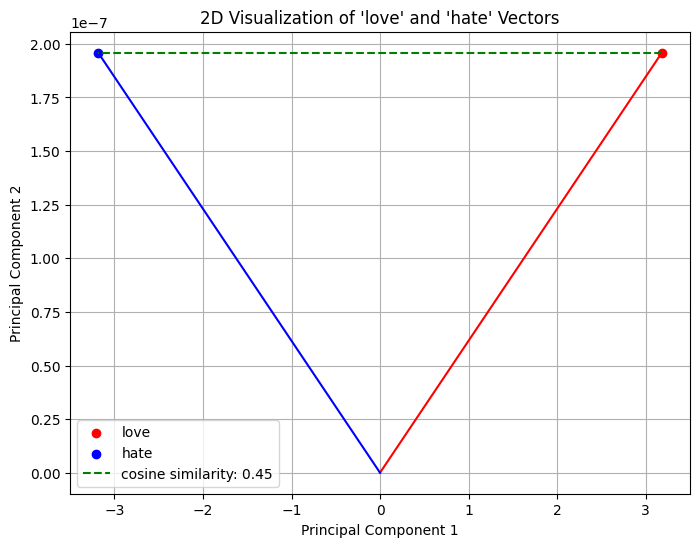

In [16]:
vectors = np.array([vec1, vec2])

pca = PCA(n_components=2)

vectors_2d = pca.fit_transform(vectors)


plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[0, 0], vectors_2d[0, 1], color='red', label='love')
plt.scatter(vectors_2d[1, 0], vectors_2d[1, 1], color='blue', label='hate')

plt.plot([0, vectors_2d[0, 0]], [0, vectors_2d[0, 1]], color='red')
plt.plot([0, vectors_2d[1, 0]], [0, vectors_2d[1, 1]], color='blue')

mid_point = (vectors_2d[0] + vectors_2d[1]) / 2
plt.plot([vectors_2d[0, 0], vectors_2d[1, 0]], [vectors_2d[0, 1], vectors_2d[1, 1]], color='green', linestyle='--', label=f'cosine similarity: {cos_sim:.2f}')

plt.title("2D Visualization of 'love' and 'hate' Vectors")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Similar Vectors for Love Vector

In [17]:
def find_closest_embeddings(embedding_vectors, word_vector):
    cosine_similarities = np.dot(embedding_vectors, word_vector) / (np.linalg.norm(embedding_vectors, axis=1) * np.linalg.norm(word_vector))
    return np.argsort(cosine_similarities)[::-1]


In [18]:
words = list(embeddings_index.keys())

embedding_vectors = np.array(list(embeddings_index.values()))

In [19]:
love_vector = get_vector("love")

In [20]:
closest_indices = find_closest_embeddings(embedding_vectors, love_vector)

In [21]:
closest_words = [words[idx] for idx in closest_indices[:10]]

In [22]:
closest_words

['love',
 'loves',
 'passion',
 'loved',
 'romantic',
 'lovers',
 'lover',
 'you',
 'me',
 'affection']

# Similarity Between Global Keywords

In [23]:
words_of_interest = ["leader", "world", "economy", "consumption", "resources", "technology"]

word_vectors = [get_vector(word) for word in words_of_interest]

In [24]:
word_vectors

[array([-0.38987  , -0.28501  ,  0.037706 , -0.14242  , -0.12169  ,
        -0.8087   , -0.69836  ,  0.13776  ,  0.55947  , -1.148    ,
        -0.10584  , -0.89086  , -0.042501 ,  0.099975 ,  0.45386  ,
         0.46875  , -0.19503  ,  0.57894  , -0.25875  , -0.2269   ,
         0.26406  , -0.2001   ,  0.32875  , -0.16896  , -0.4461   ,
        -0.47999  ,  0.048237 ,  0.24675  ,  0.51156  , -0.39981  ,
        -0.39374  , -0.35203  ,  0.15264  ,  0.20066  , -0.94835  ,
        -0.12174  ,  0.89757  , -0.051645 , -0.1433   , -0.2033   ,
         0.13872  ,  0.096005 , -0.23784  , -0.45378  , -0.58099  ,
        -0.32363  ,  0.12361  ,  0.0063181, -0.1128   ,  0.045652 ,
         0.12079  , -0.34439  , -0.49208  ,  0.73361  ,  0.45632  ,
         0.49815  , -0.38611  , -0.29059  ,  0.42736  ,  0.032591 ,
         0.24554  ,  0.15186  ,  0.1273   ,  0.54589  , -0.045713 ,
        -0.30699  ,  0.062182 , -0.58531  , -0.027121 ,  0.2696   ,
        -0.074764 ,  0.17292  , -0.09801  , -0.2

In [25]:
combined_vector = np.sum(word_vectors, axis=0)

In [26]:
closest_indices = find_closest_embeddings(embedding_vectors, combined_vector)

In [27]:
closest_words = [words[idx] for idx in closest_indices if words[idx] not in words_of_interest][:10]

In [28]:
closest_words

['global',
 'economic',
 'industry',
 'sector',
 'country',
 'demand',
 'growth',
 'development',
 'energy',
 'market']

# Similarity Between Global Keywords and Countries

In [29]:
country_list = ["united_states", "usa", "us", "china", "japan", "germany", "india", "united_kingdom", "france", "brazil", "italy",
                "canada", "russia", "south_korea", "australia", "spain", "mexico", "indonesia", "netherlands", "saudi_arabia",
                "turkey", "switzerland"]



In [30]:
country_vectors = [embeddings_index.get(country) for country in country_list]

In [32]:
valid_country_vectors = [vec for vec in country_vectors if vec is not None]

In [33]:
valid_countries = [country for country, vec in zip(country_list, country_vectors) if vec is not None]

In [34]:
if len(valid_country_vectors) != len(country_list):
    missing_countries = [country for country, vec in zip(country_list, country_vectors) if vec is None]
    print("Missing countries:", missing_countries)

Missing countries: ['united_states', 'united_kingdom', 'south_korea', 'saudi_arabia']


In [35]:
embedding_vectors = np.array(valid_country_vectors)

In [36]:
closest_indices = find_closest_embeddings(embedding_vectors, combined_vector)

In [37]:
closest_countries = [valid_countries[idx] for idx in closest_indices[:3]]

In [38]:
closest_countries

['china', 'us', 'japan']

# king - man + woman = ?

In [39]:
words = ['king', 'queen', 'man', 'woman', 'cat', 'dog', 'kitten', 'houses', 'love', 'surprise', 'happy', 'sad', 'angry']

word_vectors = {word: get_vector(word) for word in words if get_vector(word) is not None}

In [40]:
result_vector = get_vector('king') - get_vector('man') + get_vector('woman')

In [41]:
closest_words = find_closest_embeddings(np.array(list(word_vectors.values())), result_vector)

In [42]:
closest_words = [list(word_vectors.keys())[idx] for idx in closest_words[:5]]
print("king - man + woman = ?")
print("Closest words: ", closest_words)

king - man + woman = ?
Closest words:  ['king', 'queen', 'woman', 'love', 'cat']


In [43]:
def plot_word_vector_tsne(word_vectors):
    vectors = np.array(list(word_vectors.values()))
    labels = list(word_vectors.keys())

    tsne = TSNE(n_components=2, perplexity=5, random_state=0)
    tsne_result = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 10))
    for i, label in enumerate(labels):
        plt.scatter(tsne_result[i, 0], tsne_result[i, 1])
        plt.annotate(label, (tsne_result[i, 0], tsne_result[i, 1]))
    plt.title('Word Embeddings T-SNE')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.grid(True)
    plt.show()


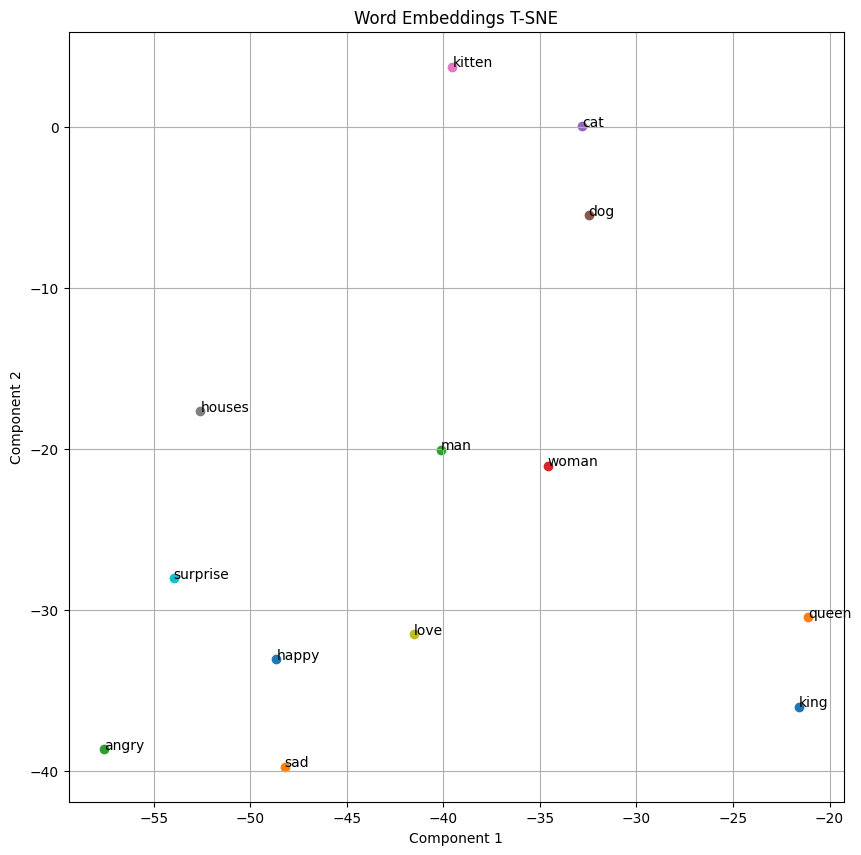

In [44]:
plot_word_vector_tsne(word_vectors)